#Податочно множество
Симнете го датасетот од линкот кој ви е поставен на самата задача, потоа истиот поставете го локално за да го вчитате.
Во случај на грешка при вчитување на .csv додадете аргумент `encoding='latin-1`


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import keras
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
import keras
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Претпроцесирање кое е потребно

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Youtube Playlist Comments with Sentiments.csv')


In [4]:
df

,Name,Lecture,Comment,Time,Likes,Reply Count,Sentiments
0,@abihayyyy,1,Great great sir 👍,2024-01-18T15:48:13Z,0,0,positive
1,@lifesolutions283,1,Sir ap se kese contact kia jae,2024-01-18T07:08:03Z,0,0,neutral
2,@user-cl9hn2rm7r,1,Great work keep it up,2024-01-18T02:30:55Z,0,0,positive
3,@arcollection5965,1,Sir g ma ya freelance krna chati ho but mujy ...,2024-01-18T00:53:57Z,0,0,neutral
4,@HusnainHayyat-cw4rd,1,"sir, i husnain, aap ko faisalabad se aik bril...",2024-01-17T06:43:35Z,0,0,positive
...,...,...,...,...,...,...,...
4517,@munazzaabdurraheem2856,35,Thnakiioo and save u and your team from evil eyes,2023-09-27T18:10:19Z,0,0,positive
4518,@munazzaabdurraheem2856,35,You are good teacher 😊consistently I don&#39;t...,2023-09-27T18:09:33Z,3,0,positive
4519,@jawadhussain78611,35,Sir love you....,2023-09-27T16:43:19Z,1,0,positive
4520,@javaria_Ibrahim,35,I am javaria Sir hamari duayen apke sath hain ...,2023-09-27T16:32:24Z,1,0,positive


In [5]:
df.isnull().sum()

Name           0
Lecture        0
Comment        0
Time           0
Likes          0
Reply Count    0
Sentiments     0
dtype: int64

In [6]:
df.columns

Index(['Name', 'Lecture', 'Comment', 'Time', 'Likes', 'Reply Count',
       'Sentiments'],
      dtype='object')

In [7]:
fea=['Comment','Sentiments']

In [10]:
df=df[fea]

In [11]:
df

,Comment,Sentiments
0,Great great sir 👍,positive
1,Sir ap se kese contact kia jae,neutral
2,Great work keep it up,positive
3,Sir g ma ya freelance krna chati ho but mujy ...,neutral
4,"sir, i husnain, aap ko faisalabad se aik bril...",positive
...,...,...
4517,Thnakiioo and save u and your team from evil eyes,positive
4518,You are good teacher 😊consistently I don&#39;t...,positive
4519,Sir love you....,positive
4520,I am javaria Sir hamari duayen apke sath hain ...,positive


In [17]:
df['Sentiments'].value_counts()

positive    2195
neutral     1248
negative     521
not          478
the           72
you            8
Name: Sentiments, dtype: int64

In [22]:
df = df[df['Sentiments'].isin(['positive', 'negative', 'neutral'])]


In [23]:
df['Sentiments'].value_counts()

positive    2195
neutral     1248
negative     521
Name: Sentiments, dtype: int64

<Axes: >

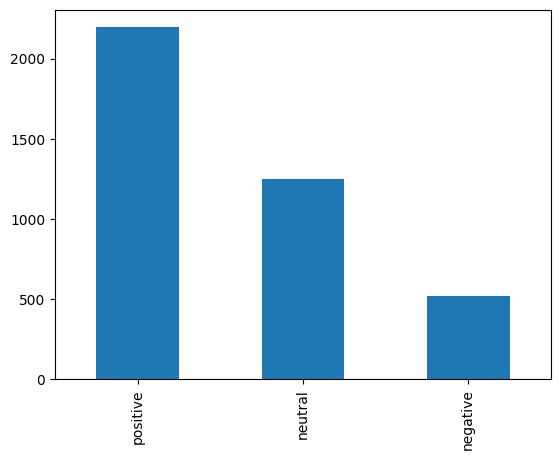

In [25]:
df['Sentiments'].value_counts().plot.bar()

In [27]:
X = df['Comment']
Y = pd.get_dummies(df['Sentiments'])

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [29]:
df['num_words'] = df['Comment'].apply(lambda x: len(x.split(" ")))

<ipython-input-29-abec1843f4ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['Comment'].apply(lambda x: len(x.split(" ")))


<Axes: >

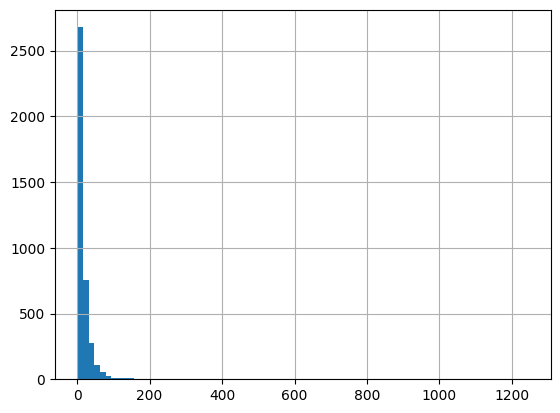

In [34]:
df['num_words'].hist(bins=80)

In [36]:
max_tokens=100

#Модел 1: Трансформер модел

In [37]:
tokenizer = Tokenizer(num_words=max_tokens)
tokenizer.fit_on_texts(X_train.values)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [38]:
len_tokens = [len(token_list) for token_list in X_train]

(array([2.957e+03, 1.510e+02, 3.200e+01, 1.300e+01, 7.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

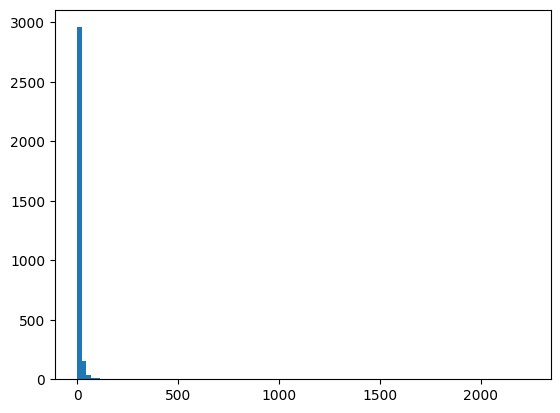

In [41]:
plt.hist(len_tokens,bins=100)

In [42]:
maxlen=80

In [43]:
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [45]:
X_train.shape

(3171, 80)

#Модел 2: Невронска мрежа

In [46]:
num_classes=3

In [47]:
model = Sequential()
model.add(Embedding(max_tokens, 32, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

In [48]:
model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

In [61]:
history = model.fit(X_train, Y_train, validation_split=0.2, batch_size=64, epochs=15)

Epoch 1/15
40/40 [==============================] - 4s 107ms/step - loss: 0.5623 - precision: 0.8316 - recall: 0.7031 - val_loss: 0.7145 - val_precision: 0.7375 - val_recall: 0.6016
Epoch 2/15
40/40 [==============================] - 2s 52ms/step - loss: 0.5529 - precision: 0.8255 - recall: 0.7165 - val_loss: 0.7402 - val_precision: 0.7345 - val_recall: 0.6362
Epoch 3/15
40/40 [==============================] - 2s 52ms/step - loss: 0.5379 - precision: 0.8237 - recall: 0.7240 - val_loss: 0.7440 - val_precision: 0.7338 - val_recall: 0.6252
Epoch 4/15
40/40 [==============================] - 2s 52ms/step - loss: 0.5244 - precision: 0.8403 - recall: 0.7259 - val_loss: 0.7362 - val_precision: 0.7362 - val_recall: 0.6283
Epoch 5/15
40/40 [==============================] - 4s 103ms/step - loss: 0.5069 - precision: 0.8483 - recall: 0.7319 - val_loss: 0.7324 - val_precision: 0.7379 - val_recall: 0.6252
Epoch 6/15
40/40 [==============================] - 3s 62ms/step - loss: 0.4949 - precision: 

#Eвалуација на двата модели и споредба

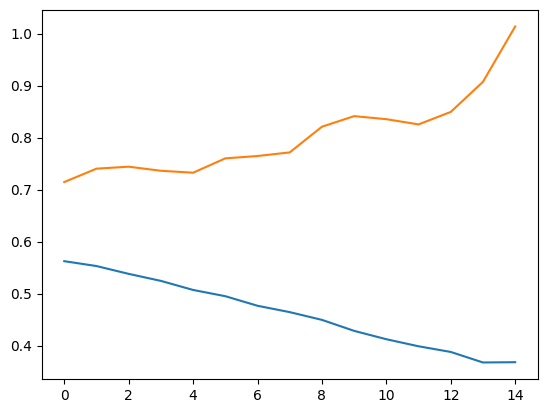

In [62]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.show()

In [63]:
preds = model.predict(X_test)

25/25 [==============================] - 0s 8ms/step


In [64]:
print(classification_report(np.argmax(Y_test.values, axis=1), np.argmax(preds, axis=1)))

              precision    recall  f1-score   support

           0       0.38      0.25      0.30       102
           1       0.72      0.63      0.67       256
           2       0.77      0.88      0.82       435

    accuracy                           0.72       793
   macro avg       0.62      0.59      0.60       793
weighted avg       0.70      0.72      0.71       793



In [65]:
from sklearn.metrics import f1_score

In [66]:
print(confusion_matrix(np.argmax(Y_test.values, axis=1), np.argmax(preds, axis=1)))

[[ 25  30  47]
 [ 24 162  70]
 [ 17  34 384]]
